In [1]:
struct Pt
    x
    y
end

function _get_sp_intersection(A, B, l)
    t = ((A.y - B.y) - l*(A.x - B.x)) / 2l
    return Pt(A.x + t, A.y - t*l)
end

function shubert_piyavskii(f, a, b, l, ϵ, δ=0.01)
    m = (a+b)/2
    A, M, B = Pt(a, f(a)), Pt(m, f(m)), Pt(b, f(b))
    pts = [A, _get_sp_intersection(A, M, l),
            M, _get_sp_intersection(M, B, l), B]
    
    x = 2:0.1:16
    plot(x, f(x), framestyle = :box, xlabel = "x", ylabel = "f(x)", label = "") 
    Plots.frame(anim)
    
    plot!([pts[1].x, pts[2].x], [pts[1].y, pts[2].y], label = "", lw = 1)
    plot!([pts[2].x, pts[3].x], [pts[2].y, pts[3].y], label = "", lw = 1)
    Plots.frame(anim)
    
    plot!([pts[3].x, pts[4].x], [pts[3].y, pts[4].y], label = "", lw = 1)
    plot!([pts[4].x, pts[5].x], [pts[4].y, pts[5].y], label = "", lw = 1)
    Plots.frame(anim)

    Δ = Inf
    while Δ > ϵ
        i = argmin([P.y for P in pts])
        P = Pt(pts[i].x, f(pts[i].x))
        Δ = P.y - pts[i].y
        P_prev = _get_sp_intersection(pts[i-1], P, l)
        P_next = _get_sp_intersection(P, pts[i+1], l)
        deleteat!(pts, i)
        insert!(pts, i, P_next)
        insert!(pts, i, P)
        insert!(pts, i, P_prev)
        
        plot!([pts[1].x, pts[2].x], [pts[1].y, pts[2].y], label = "", lw = 1)
        plot!([pts[2].x, pts[3].x], [pts[2].y, pts[3].y], label = "", lw = 1)    
        plot!([pts[3].x, pts[4].x], [pts[3].y, pts[4].y], label = "", lw = 1)
        plot!([pts[4].x, pts[5].x], [pts[4].y, pts[5].y], label = "", lw = 1)
        Plots.frame(anim)
    end
    
    intervals = []
    i = 2*(argmin([P.y for P in pts[1:2:end]])) - 1
    for j in 2:2:length(pts)
        if pts[j].y < pts[i].y
            dy = pts[i].y - pts[j].y
            x_lo = max(a, pts[j].x - dy/l)
            x_hi = min(b, pts[j].x + dy/l)
            if !isempty(intervals) && intervals[end][2] + δ ≥ x_lo
                intervals[end] = (intervals[end][1], x_hi)
            else
                push!(intervals, (x_lo, x_hi))
            end
        end
    end
    return (pts[i], intervals)
end

shubert_piyavskii (generic function with 2 methods)

In [2]:
f(x) = abs.(0.5x.^0.2) .- cos.(x)

f (generic function with 1 method)

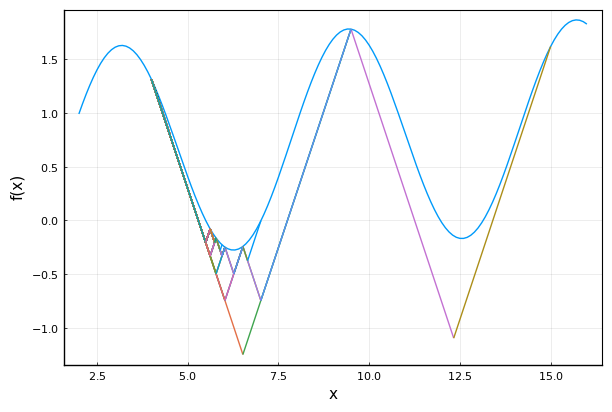

 56.663841 seconds (76.45 M allocations: 2.952 GiB, 1.48% gc time)


(Pt(6.26002943705861, -0.2781505988391787), Any[(6.143499112195914, 6.143797588986941), (6.155704547117324, 6.188853857206061), (6.206590696993559, 6.318798329734097), (6.335408424707977, 6.343264248107967)])

In [3]:
using Plots
pyplot()
anim = Plots.Animation()
@time shubert_piyavskii(f, 4.0, 15.0, 1.018, 0.001)

┌ Info: Saved animation to 
│   fn = C:\Users\Kelvyn\Dropbox\TecNM-Orizaba\Cursos\MCIQ\Optimization with Julia Programming\Course Files\Code\test.gif
└ @ Plots C:\Users\Kelvyn\.julia\packages\Plots\uCh2y\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Kelvyn\\Dropbox\\TecNM-Orizaba\\Cursos\\MCIQ\\Optimization with Julia Programming\\Course Files\\Code\\test.gif")
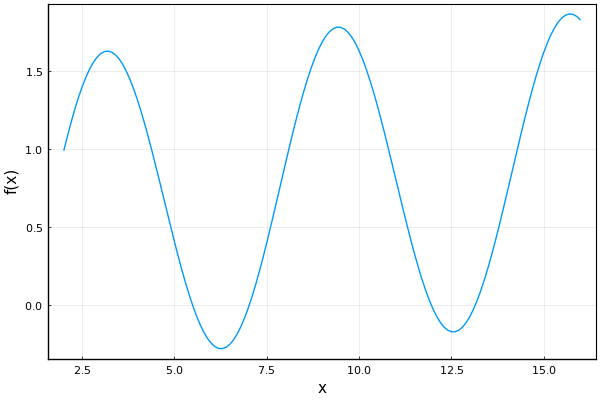

In [5]:
gif(anim, "test.gif", fps = 1)